In [2]:
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

#import data
test_data = pd.read_csv("test.data.csv")
train_data = pd.read_csv("train.data.csv")
fancy_house = pd.read_csv("fancyhouse.csv")

In [3]:
train_data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,4,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,5,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,6,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
4,7,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [4]:
#a) R^2 on training data
y_train = train_data[["price"]]
X_train = train_data[['bedrooms',"bathrooms","sqft_living","sqft_lot"]]

y_test = test_data[["price"]]
X_test = test_data[['bedrooms',"bathrooms","sqft_living","sqft_lot"]]




In [5]:
#fit model
linear_model = LinearRegression().fit(X = X_train, y = y_train)

#generate predictions using train data to calculate training R^2
train_preds = linear_model.predict(X_train)
test_preds = linear_model.predict(X_test)

print("Training R^2:  {}".format(r2_score(y_true = y_train,y_pred=train_preds)))
print("Test R^2:  {}".format(r2_score(y_true = y_test, y_pred=test_preds)))


Training R^2:  0.5101138530794578
Test R^2:  0.504994461403709


In [6]:
#b)
fancy_house_data = fancy_house[['bedrooms',"bathrooms","sqft_living","sqft_lot"]]#select the correct variables for the model

#predict price of the house
predicted_price = linear_model.predict(fancy_house_data)

print("Predicted Price of Bill Gate's House:   {}".format(predicted_price[0]))

#


Predicted Price of Bill Gate's House:   [15436769.53822442]


15 milly for Bill Gate's compound? Seems  a little low honestly

In [7]:
#c)
#update data with new variable
X_train["bed_bath_interaction"] = X_train["bedrooms"]*X_train["bathrooms"]
X_test["bed_bath_interaction"] = X_test["bedrooms"]* X_test["bathrooms"]
fancy_house_data["bed_bath_interaction"] = fancy_house_data["bedrooms"]*fancy_house_data["bathrooms"]


linear_model = LinearRegression().fit(X = X_train, y = y_train)

#generate predictions using train data to calculate training R^2
train_preds = linear_model.predict(X_train)
test_preds = linear_model.predict(X_test)

print("New Training R^2:  {}".format(r2_score(y_true = y_train,y_pred=train_preds)))
print("New Test R^2:  {}".format(r2_score(y_true = y_test, y_pred=test_preds)))


New Training R^2:  0.5173532927738305
New Test R^2:  0.5105355458590626


/Users/collinkennedy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/collinkennedy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/collinkennedy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is tryi

**Part d)**

In [16]:
#d)

def gradient_descent(X,y, learning_parameter = .000000000000076, max_iter = 1000, tau = 1):
    #X is our data matrix
    #y is our vector of observed outcomes
    #beta vector is our initial guess of our beta's
    #learning parameter determines the rate at which the function converges
    #n_iterations determines the number of iterations
    X = np.array(X)
    y = np.array(y)
    n = len(y)
    p = X.shape[1]

    #use this to store SSE
    MSE_list = list()
    
    #initialize random betas
    beta = np.random.normal(size = p ).reshape(p,1)

    
    iter_counter = 0
    while True:

        #calculate gradient
        gradient = X.T @ (X @ beta - y)

        #update beta vector
        beta = beta - learning_parameter * gradient

        #calculate norm of the gradient. if this falls below the threshold end loop
        gradient_norm = np.linalg.norm(beta)

        #calculate predictions for the current iteration
        y_hat = X @ beta
        rsquare = r2_score(y_true = y, y_pred = y_hat)
        MSE = mean_squared_error(y_true = y, y_pred = y_hat)
        MSE_list.append(MSE)
        if(iter_counter in [1,max_iter-1,max_iter-2]):
            print("R^2 of current iteration:   {}".format(rsquare))
        iter_counter +=1
        if(gradient_norm < tau or iter_counter > max_iter):
            break
    
    return(beta, MSE_list)
    
    

In [17]:
betas, returned_MSE_list = gradient_descent(X_train,y_train)

R^2 of current iteration:   -2.0973904511671897
R^2 of current iteration:   0.49249213470019937
R^2 of current iteration:   0.4924931595807125


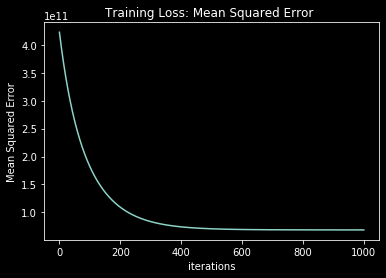

In [18]:
from matplotlib import style
style.use('dark_background')
plt.figure()
plt.plot(np.arange(0, len(returned_MSE_list)), returned_MSE_list) ## fix
plt.title("Training Loss: Mean Squared Error ")
plt.xlabel("iterations")
plt.ylabel("Mean Squared Error")
plt.show()

In [21]:
# REPEAT a)
#standardize X_train

variables = ["bedrooms","bathrooms","sqft_living","sqft_lot"]

betas_gd_A, returned_MSE_list = gradient_descent(X_train[variables],y_train)

#calculate predictions
y_hat_gd_A_train = X_train[variables] @ betas_gd_A # get predictions for training data
train_r2 = r2_score(y_true = y_train, y_pred = y_hat_gd_A_train) #training R2
y_hat_gd_A_test = X_test[variables] @ betas_gd_A # get test predictions
test_r2 = r2_score(y_true = y_test, y_pred = y_hat_gd_A_test)


print("Train R2 (Model w/ Gradient Descent):   {}".format(train_r2))
print("Test R2 (Model w/ Gradient Descent):    {}".format(test_r2))

R^2 of current iteration:   -1.8710858127099494
R^2 of current iteration:   0.49249294464238735
R^2 of current iteration:   0.49249398973852776
Train R2 (Model w/ Gradient Descent):   0.4924950244434616
Test R2 (Model w/ Gradient Descent):    0.48905967002830364


In [ ]:
#Repeat part b)


In [ ]:
#Repeat b)
betas_gd_A, returned_MSE_list = gradient_descent(X_train[variables],y_train)

#calculate predictions
y_hat_gd_A_train = X_train[variables] @ betas_gd_A # get predictions for training data
train_r2 = r2_score(y_true = y_train, y_pred = y_hat_gd_A_train) #training R2
y_hat_gd_A_test = X_test[variables] @ betas_gd_A # get test predictions
test_r2 = r2_score(y_true = y_test, y_pred = y_hat_gd_A_test)


print("Train R2 (Model w/ Gradient Descent):   {}".format(train_r2))
print("Test R2 (Model w/ Gradient Descent):    {}".format(test_r2))